# Introduction to Gradio

In [1]:
!pip install gradio

     |████████████████████████████████| 2.0 MB 5.3 MB/s 
     |████████████████████████████████| 206 kB 47.5 MB/s 
     |████████████████████████████████| 1.9 MB 36.0 MB/s 
     |████████████████████████████████| 3.5 MB 52.0 MB/s 
     |████████████████████████████████| 961 kB 51.0 MB/s 
     |████████████████████████████████| 63 kB 2.4 MB/s 
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4710 sha256=9abfce9ff68429a52d03d0c493481354ddf40f6a969bd7b1df1d9197deeb4cad
  Stored in directory: /root/.cache/pip/wheels/13/e4/6c/e8059816e86796a597c6e6b0d4c880630f51a1fcfa0befd5e6
  Created wheel for flask-cachebuster: filename=Flask_CacheBuster-1.0.0-py3-none-any.whl size=3371 sha256=5705be871d554399d83cfcef54424446d8e2da889e944f7038535e8281832a6b
  Stored in directory: /root/.cache/pip/wheels/28/c0/c4/44687421dab41455be93112bd1b0dee1f3c5a9aa27bee63708
Successfully built ffmpy flask-cachebuster


In [6]:
import gradio as gr

In [7]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

In [8]:
objects =  tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = objects.load_data()

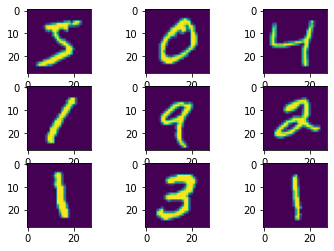

In [9]:
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(training_images[i])

In [10]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [11]:
from tensorflow.keras.layers import Flatten, Dense
model = tf.keras.models.Sequential([Flatten(input_shape=(28,28)), 
                                    Dense(256, activation='relu'),
                                    Dense(256, activation='relu'),
                                    Dense(128, activation='relu'), 
                                    Dense(10, activation=tf.nn.softmax)])

In [12]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2045 - accuracy: 0.9375
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0891 - accuracy: 0.9724
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0650 - accuracy: 0.9796
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0521 - accuracy: 0.9833
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0392 - accuracy: 0.9878
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0335 - accuracy: 0.9897
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0308 - accuracy: 0.9905
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0249 - accuracy: 0.9922
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0227 - accuracy: 0.9927
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.020

In [14]:
def predict_image(img):
  img_3d=img.reshape(-1,28,28)
  im_resize=img_3d/255.0
  prediction=model.predict(im_resize)
  pred=np.argmax(prediction)
  return pred

In [15]:
iface = gr.Interface(predict_image, inputs="sketchpad", outputs="label")

In [16]:
iface.launch(debug='True')

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
This share link will expire in 72 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted
Running on External URL: https://13185.gradio.app


KeyboardInterrupt: ignored

# 2. 

In [ ]:

import gradio as gr

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

/root/.keras/datasets/flower_photos/roses/165985535_7178ce6350.jpg


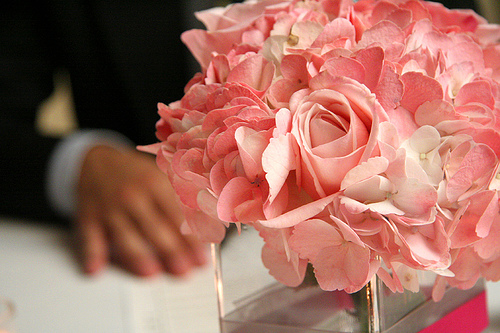

In [ ]:
roses = list(data_dir.glob('roses/*'))
print(roses[0])
PIL.Image.open(str(roses[0]))

In [ ]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:

class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


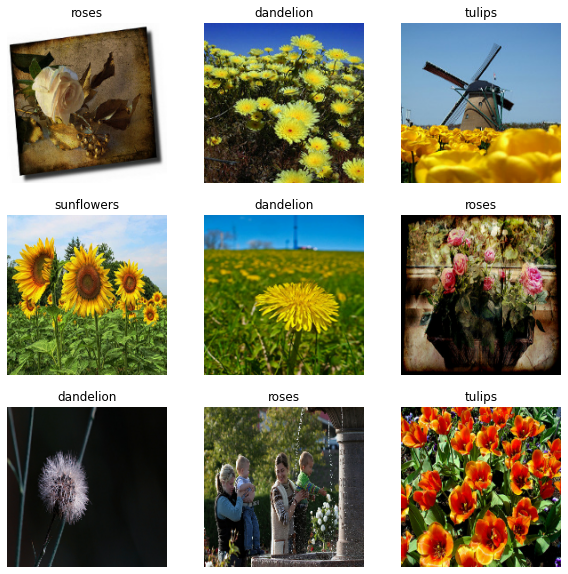

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:

num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [ ]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=1
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


92/92 [==============================] - 9s 88ms/step - loss: 1.3412 - accuracy: 0.4404 - val_loss: 1.1031 - val_accuracy: 0.5668


In [ ]:
def predict_image(img):
  img_4d=img.reshape(-1,180,180,3)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(5)}

In [ ]:
image = gr.inputs.Image(shape=(180,180))
label = gr.outputs.Label(num_top_classes=5)

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
This share link will expire in 72 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted
Running on External URL: https://21108.gradio.app


KeyboardInterrupt: ignored

#  Develop web application to compare two models in flowers classification

In [ ]:
!pip install gradio

     |████████████████████████████████| 2.0 MB 4.2 MB/s 
     |████████████████████████████████| 1.9 MB 21.2 MB/s 
     |████████████████████████████████| 206 kB 50.3 MB/s 
     |████████████████████████████████| 961 kB 51.2 MB/s 
     |████████████████████████████████| 3.5 MB 36.6 MB/s 
     |████████████████████████████████| 63 kB 2.3 MB/s 
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4710 sha256=fd6351434d80f31a052883a6f8484135c2ce78c2502f3a4c3c78162d649c761a
  Stored in directory: /root/.cache/pip/wheels/13/e4/6c/e8059816e86796a597c6e6b0d4c880630f51a1fcfa0befd5e6
  Created wheel for flask-cachebuster: filename=Flask_CacheBuster-1.0.0-py3-none-any.whl size=3371 sha256=864c0dc901ca5e7771116096db7adcf4c53fe8ed77cf2c4fb8b02efb675a9218
  Stored in directory: /root/.cache/pip/wheels/28/c0/c4/44687421dab41455be93112bd1b0dee1f3c5a9aa27bee63708
Successfully built ffmpy flask-cachebuster


In [ ]:
import gradio as gr

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

/root/.keras/datasets/flower_photos/roses/7525783408_0999483bf4_m.jpg


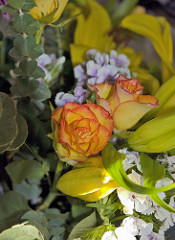

In [ ]:
roses = list(data_dir.glob('roses/*'))
print(roses[5])
PIL.Image.open(str(roses[5]))

In [ ]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


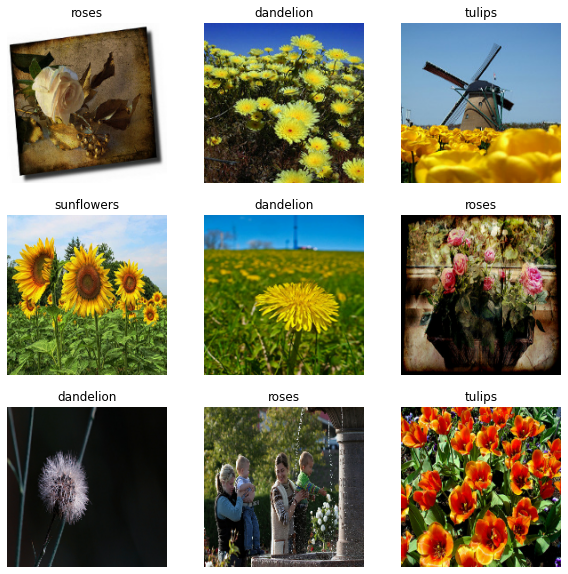

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [ ]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 22, 22, 64)       

In [ ]:

epochs=1
history = model.fit(
  train_ds,
  steps_per_epoch=8,
  validation_data=val_ds,
  epochs=epochs
)

/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


8/8 [==============================] - 3s 303ms/step - loss: 2.3492 - accuracy: 0.2656 - val_loss: 1.6056 - val_accuracy: 0.2330


In [ ]:
epochs= 1
from tensorflow.keras.applications import InceptionV3
model1= Sequential()

pretrained_model= InceptionV3(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
print(len(pretrained_model.layers))

for layer in pretrained_model.layers:
        layer.trainable=False
model1.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))
model1.add(pretrained_model)
model1.add(layers.Flatten())
model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dense(128, activation='relu'))
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(num_classes,activation='softmax'))

312


In [ ]:
model1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_4 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
inception_v3 (Functional)    (None, 2048)              21802784  
_________________________________________________________________
flatten_6 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               524544    
_________________________________________________________________
dense_19 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_20 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_21 (Dense)             (None, 5)                

In [ ]:
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model1.save('/content/sample_data')

INFO:tensorflow:Assets written to: /content/sample_data/assets


In [ ]:
model1.fit(
  train_ds,
  validation_data=val_ds,
  steps_per_epoch=5,
  epochs=epochs
)

/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


5/5 [==============================] - 11s 1s/step - loss: 1.5258 - accuracy: 0.2438 - val_loss: 1.1926 - val_accuracy: 0.2221


In [ ]:
from PIL import Image
import cv2
def classify_with_hybrid(im):
  print('iMAGE1',im)
  im = Image.fromarray(im.astype('uint8'), 'RGB')
  im = im.resize((180,180))
  arr = np.array(im).reshape((-1, 180,180, 3))	
  prediction=model.predict(arr)[0]
  return {class_names[i]: float(prediction[i]) for i in range(5)}

def classify_with_inception(im):
  print('iMAGE 2',im)
  im = Image.fromarray(im.astype('uint8'), 'RGB')
  im = im.resize((180,180))
  arr = np.array(im).reshape((-1,180,180, 3))	
  arr = tf.keras.applications.inception_v3.preprocess_input(arr)
  prediction = model1.predict(arr).flatten()
  return {class_names[i]: float(prediction[i]) for i in range(5)}

In [ ]:
import requests
from urllib.request import urlretrieve
urlretrieve("https://www.thephotoargus.com/wp-content/uploads/2020/02/rosepic12.jpg","rose.jpg")
urlretrieve("https://media.istockphoto.com/vectors/sunflower-flower-isolated-vector-id927047528?k=6&m=927047528&s=612x612&w=0&h=KZZ734lZ6zsEtw7zwi9QaSIsIXaQ9Us-mLTZ-AFSTPA=","sunflower.jpg")
urlretrieve("https://upload.wikimedia.org/wikipedia/commons/c/ce/Daisy_G%C3%A4nsebl%C3%BCmchen_Bellis_perennis_01.jpg","daisy.jpg");

In [ ]:
imagein = gr.inputs.Image()
label = gr.outputs.Label(num_top_classes=3)

sample_images = [
                 ["rose.jpg"],
                 ["sunflower.jpg"],
                 ["daisy.jpg"]
]

gr.Interface(
    [classify_with_hybrid,classify_with_inception], 
    imagein, 
    label,
    title="Hybrid Model vs. InceptionNet",
    description="Our hybrid model gives faster and accurate results than the Inception model",
    examples=sample_images
).launch(debug='True');

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
This share link will expire in 72 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted
Running on External URL: https://44570.gradio.app


iMAGE1 [[[19 25 57]
  [19 25 57]
  [19 25 57]
  ...
  [18 21 52]
  [18 21 52]
  [18 21 52]]

 [[19 25 57]
  [19 25 57]
  [19 25 57]
  ...
  [18 21 52]
  [18 21 52]
  [18 21 52]]

 [[19 25 57]
  [19 25 57]
  [19 25 57]
  ...
  [19 23 52]
  [19 23 52]
  [19 23 52]]

 ...

 [[41 70 88]
  [41 70 88]
  [42 71 89]
  ...
  [17 27 54]
  [17 27 54]
  [17 27 54]]

 [[41 70 88]
  [41 70 88]
  [42 71 89]
  ...
  [17 27 54]
  [17 27 54]
  [17 27 54]]

 [[41 70 88]
  [41 70 88]
  [42 71 89]
  ...
  [17 27 54]
  [17 27 54]
  [17 27 54]]]
iMAGE1 [[[26 52 41]
  [26 52 41]
  [26 52 41]
  ...
  [44 42 43]
  [44 42 43]
  [44 42 43]]

 [[26 52 41]
  [26 52 41]
  [26 52 41]
  ...
  [44 42 43]
  [44 42 43]
  [44 42 43]]

 [[26 52 41]
  [26 52 41]
  [26 52 41]
  ...
  [44 42 43]
  [44 42 43]
  [44 42 43]]

 ...

 [[50 47 54]
  [51 48 55]
  [51 48 55]
  ...
  [42 39 46]
  [42 39 46]
  [42 39 46]]

 [[47 44 51]
  [49 46 53]
  [51 48 55]
  ...
  [42 39 46]
  [42 39 46]
  [42 39 46]]

 [[44 41 48]
  [47 44 51]
  

KeyboardInterrupt: ignored

# Introduction to Streamlit

# Let us see sample Applications

#Question 1: Develop a web application using Streamlit to classify the flowers

# Question 2. Implement Text Summarization App using Streamlit



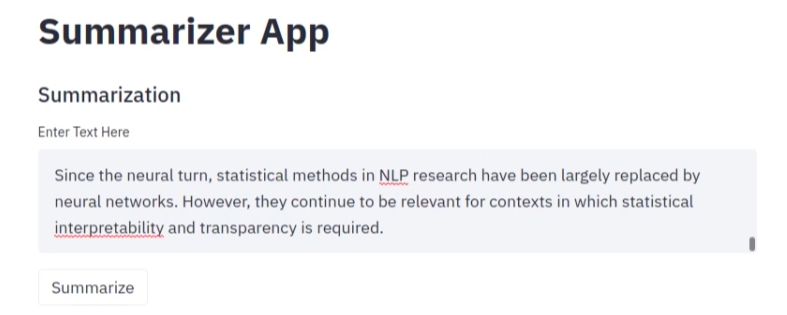

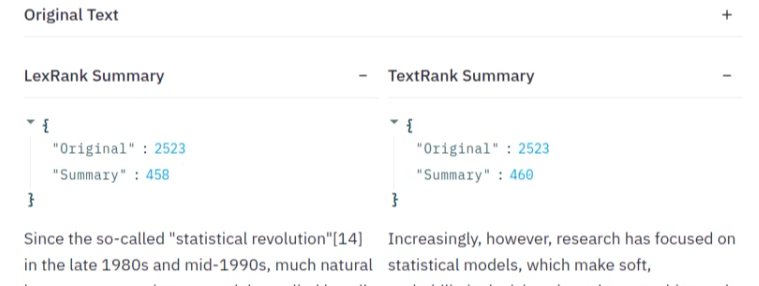

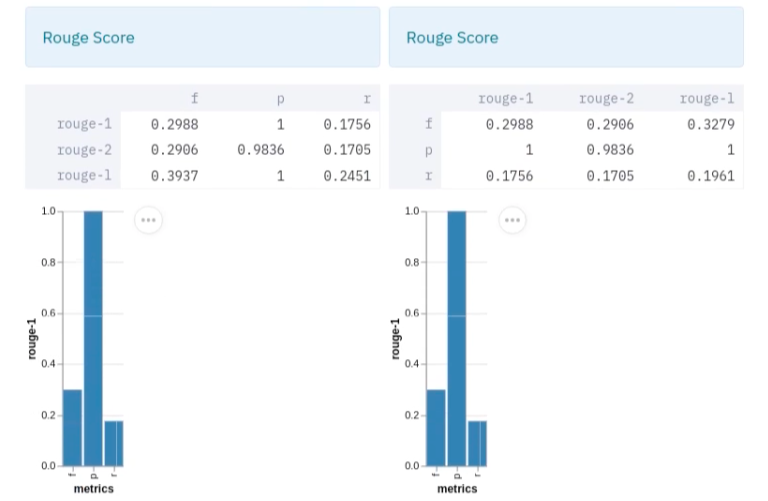

# Install gensim sumy rouge

# Question 3: Develop your own streamlit web app